[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [14]:
import anon.conf
anon.conf.config.update('jax_disable_jit', True)
import anon
import jax
import anon.atom as anp
import elle.sections
import elle.beam2d
import elle.springs
import emme as em
mat = elle.springs.isokin.no1(60.0,29e3)
# mat = elle.springs.gmp.no5(60.0,29e3)
sec = elle.sections.core_v2.Rectangle
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no1)
beam_template = elle.beam2d.resp_no6

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [15]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
P1 = model.param("P1")

# Define model components
girder_section = sec(d=60.0, b=18.0,mat=mat).assemble()
column_section = sec(d=60.0, b=18.0,mat=mat).assemble()
basic_girder  = beam_template(*[girder_section]*8, quad={"n": 8, "rule": "mid"})
basic_column  = beam_template(*[column_section]*8, quad={"n": 8, "rule": "mid"})

girder = geom_template(basic_girder)
column = geom_template(basic_column)

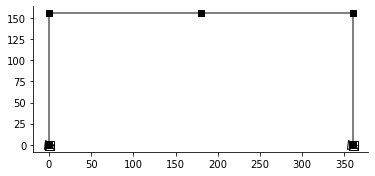

In [16]:
# Set up nodes
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", elem=column)
model.beam("b", "2", "3", elem=girder)
model.beam("c", "3", "4", elem=girder)
model.beam("d", "4", "5", elem=column)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2", P1, dof="x")
model.load("2", -1.0, dof="y")
model.load("2", -1.0, dof="y")

em.plot_structure(model);

In [17]:
f = model.compose()

In [18]:
f(1.0)

[[ 1.63539291e-02]
 [-2.02570246e-03]
 [-9.55256367e-05]
 [ 1.50486513e-02]
 [-2.12649699e-03]
 [ 4.89535361e-05]
 [ 1.37433735e-02]
 [-3.81704943e-04]
 [-7.50191192e-05]]


DeviceArray([[ 1.63539291e-02],
             [-2.02570246e-03],
             [-9.55256367e-05],
             [ 1.50486513e-02],
             [-2.12649699e-03],
             [ 4.89535361e-05],
             [ 1.37433735e-02],
             [-3.81704943e-04],
             [-7.50191192e-05]], dtype=float64)

[[-3.73841687e-04]
 [-2.39954415e-03]
 [ 4.79284214e-06]
 [-3.73841687e-04]
 [-1.20370370e-03]
 [ 7.55794337e-06]
 [-3.73841687e-04]
 [-7.86325663e-06]
 [ 4.79284214e-06]]
[[ 0.50145928]
 [ 0.00881571]
 [-0.00300476]
 [ 0.46230095]
 [-0.0288875 ]
 [ 0.00124943]
 [ 0.42314261]
 [-0.01122311]
 [-0.00238957]]
[[ 1.00329241]
 [ 0.02003096]
 [-0.00601432]
 [ 0.92497574]
 [-0.0565713 ]
 [ 0.00249129]
 [ 0.84665907]
 [-0.02243836]
 [-0.00478392]]


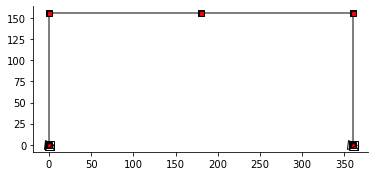

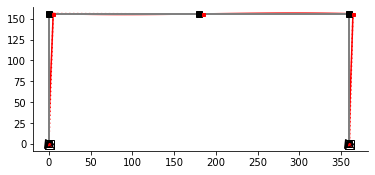

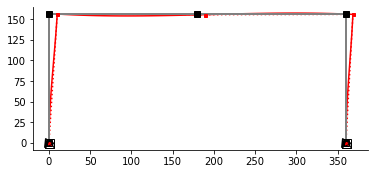

In [24]:
for i in range(3):
    fig, ax = em.plot_displ(model, f(30.*i),scale=1e1)

In [20]:
df = anon.diff.jacfwd(f, None, (0,1), squeeze=False)

In [21]:
df(20.0)

IndexError: tuple index out of range

In [ ]:
m